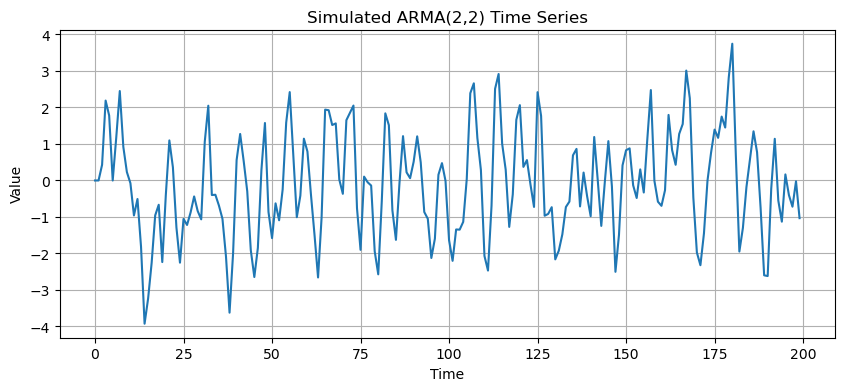

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define AR and MA coefficients
ar_coefs = np.array([0.7, -0.2])  # AR coefficients (phi)
ma_coefs = np.array([0.5, -0.3])  # MA coefficients (theta)

# Length of the time series
n = 200

# Generate white noise
np.random.seed(42)
white_noise = np.random.normal(0, 1, n)

# Simulate the ARMA(2,2) process
y = np.zeros(n)
for i in range(2, n):
    y[i] = np.dot(ar_coefs, y[i-2:i][::-1]) + np.dot(ma_coefs, white_noise[i-2:i][::-1]) + white_noise[i]

# Plot the simulated time series
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title('Simulated ARMA(2,2) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()



In [12]:
# Fit an ARMA(2,2) model to the simulated data
from statsmodels.tsa.arima.model import ARIMA 

model = ARIMA(y, order=(1,0,0))
results = model.fit()

# Print the estimated model parameters
print("AR Coefficients:", results.arparams)
print("MA Coefficients:", results.maparams)

# Make forecasts
forecast_horizon = 10
forecast_values = results.forecast(steps=forecast_horizon)


print(f"Forecasted values for the next {forecast_horizon} periods:")
print(forecast_values)


AR Coefficients: [0.58401944]
MA Coefficients: []
Forecasted values for the next 10 periods:
[-0.64510998 -0.41925221 -0.28734688 -0.2103116  -0.1653215  -0.13904641
 -0.12370125 -0.11473937 -0.10950546 -0.10644876]
